In [5]:
#İhtiyacımız olan kütüphaneleri projemize dahil ediyoruz.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #Regresyon modeli oluşturabilmek için kütüphanemiz.
from sklearn.model_selection import train_test_split, cross_val_score #veri seti ön işleme ve parçalama işlemleri
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [6]:
veriseti = pd.read_csv("C:/Users/abdullahfurkan/Desktop/data.csv")

X = veriseti.drop(['score','elapse'], axis = 1) #Regresyon analizi sonucu ulaşmak istediğimiz değeri
#ve score'a etki etmeyen değişkeni kaldırıyoruz.
y = veriseti["score"] #Hedeflediğimiz score değişkenini işlemler için başka bir değişkende tutuyoruz.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 2)
#Veri setini %70 eğitim %30 test verisi olarak karıştırarak bölüyoruz.Ve gerekli değişkenlere atıyoruz.

coklu_regresyon = LinearRegression()
#Regresyon modelimizi oluşturuyoruz.
#%70 olarak böldüğümüz eğitim verimiz ve etiketleri(score niteliği) ile eğitiyoruz.
coklu_regresyon.fit(X_train, y_train)

LinearRegression()

In [7]:
y_tahmin = coklu_regresyon.predict(X_test) #eğitilen regresyon modelini %30 olarak böldüğümüz test verisiyle test ediyoruz.
#Bu test sonucunu y tahmin adlı değişkene atıyoruz.
tahmin_sonuclari = pd.DataFrame(y_tahmin)
tahmin_sonuclari

,0
0,13.282880
1,17.065823
2,7.838363
3,0.966393
4,13.593204
...,...
3368,-1.196896
3369,10.368438
3370,29.849211
3371,12.694699


,0
0,13.282880
1,17.065823
2,7.838363
3,0.966393
4,13.593204
...,...
3368,-1.196896
3369,10.368438
3370,29.849211
3371,12.694699


In [8]:
#tahmin sonuçları ile doğru sonuçları kıyaslamak için test verisinin score sonuçlarını ekrana yazdırıyoruz.
gercek_sonuclar = pd.DataFrame(y_test)
#Sonuçları grafik üzerinde karşılaştırmak için index değerlerini düzenliyoruz.
gercek_sonuclar=gercek_sonuclar.reset_index(drop=True)
gercek_sonuclar

,score
0,13
1,17
2,8
3,1
4,13
...,...
3368,0
3369,10
3370,30
3371,13


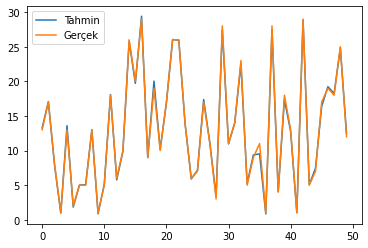

In [9]:
plt.plot(tahmin_sonuclari[0:50], label='Tahmin')

plt.plot(gercek_sonuclar[0:50], label='Gerçek')

plt.legend()

#Toplamda 3373 sonuç karmaşık bir görüntü oluştumaması için ilk 50 veri için grafiksel kıyaslama yapıyoruz.

In [10]:
np.sqrt(mean_squared_error(gercek_sonuclar,tahmin_sonuclari))
#Modelinizin başarısını RMSE metriği ile ölçüp ekrana yazdırıyoruz.

0.793146953894248

In [11]:
veriseti.describe()#score değerinin min max değerlerini almak için genel analitik duruma bakıyoruz.
#0 ile 40 arasında değer aldığını görüyoruz.

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,...,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,1.124300e+04,11243.000000,11243.000000
mean,13.299653,1.385751,1.784844,1.827804,1.174242,1.422307,1.628391,1.302944,1.412612,1.456106,...,1.667882,1.257582,1.807614,1.688695,1.845860,1.606955,1.414925,1.195542e+05,1.429956,34.014231
std,8.508833,0.489890,0.415898,0.382250,0.386075,0.498074,0.486375,0.463982,0.496285,0.505537,...,0.477931,0.449954,0.400239,0.471613,0.370342,0.495859,0.498831,1.262668e+07,0.504348,15.015611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+00,0.000000,0.000000
25%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.040000e+02,1.000000,23.000000
50%,12.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.570000e+02,1.000000,30.000000
75%,18.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.410000e+02,2.000000,43.000000
max,40.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.338845e+09,3.000000,509.000000


In [12]:
eklendi = pd.cut(veriseti["score"], bins = [-1,13.3,26.6,41], labels = ["1","2","3"])

#0 ile 40 arasında 3 aralık belileyip score özelliğine bağlı
#olarak yeni bir öznitelik oluşturuyoruz. Anlamlandırılmasının kolay olması için numerik ifadeler veriyoruz.
# düşük = 1 , orta = 2 , yüksek = 3 olarak özniteliği ekliyoruz.

veriseti["sinif"] = eklendi

veriseti

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age,sinif
0,18,2,2,2,2,1,2,1,2,2,...,1,2,2,2,1,2,211,1,50,2
1,6,2,2,2,1,2,2,1,2,1,...,1,2,2,2,2,1,149,1,40,1
2,27,1,2,2,1,2,1,2,1,2,...,2,1,1,2,1,2,168,1,28,3
3,29,1,1,2,2,2,1,2,1,1,...,2,1,2,2,1,1,230,1,37,3
4,6,1,2,1,1,1,2,1,2,1,...,1,2,2,2,0,1,389,1,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1,2,2,2,1,1,2,1,2,1,...,1,2,2,2,2,1,243,1,24,1
11239,10,2,2,1,1,1,2,1,1,1,...,1,2,1,2,2,1,197,1,39,1
11240,6,1,2,2,1,1,2,1,2,1,...,1,2,2,2,2,1,447,2,33,1
11241,12,2,2,1,1,1,1,1,1,1,...,2,2,2,2,2,1,167,1,24,1


In [ ]:
#özellik seçimi

In [64]:
X = veriseti.drop(['sinif','elapse'], axis = 1)
y = veriseti["sinif"]
knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:  1.7min finished

[2021-12-29 21:21:53] Features: 1/10 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   44.3s finished

[2021-12-29 21:22:37] Features: 2/10 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   47.7s finished

[2021-12-29 21:23:25] Features: 3/10 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:  

In [83]:
sfs1.k_feature_names_

('score', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q23', 'Q33', 'gender')

In [13]:
ozellik_indis = list(('score', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q23', 'Q33', 'gender'))
ozellik_indis.append("sinif")
yeni_veriseti=veriseti[ozellik_indis]
orjinalveriseti=veriseti.drop(['elapse'], axis = 1)

In [14]:
#10 özellikli veri seti ile sınıflandırma
X = yeni_veriseti.drop(['sinif'], axis = 1)
y = yeni_veriseti["sinif"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 42)

siniflandirma = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
siniflandirma.fit(X_train, y_train)

y_pred = siniflandirma.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Doğruluk: %.5f' % accuracy_score(y_test, y_pred))

[[1967    0    0]
 [   5 1088    0]
 [   0    0  313]]


NameError: name 'accuracy_score' is not defined

In [20]:
#Orjinal veri seti ile sınıflandırma
X = yeni_veriseti.drop(['sinif'], axis = 1)
y = yeni_veriseti["sinif"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
siniflandirma = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
siniflandirma.fit(X_train, y_train)

y_pred = siniflandirma.predict(X_test)


from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Düşük', 'Orta', 'Yüksek']))


Confusion Matrix

[[1967    0    0]
 [   5 1088    0]
 [   0    0  313]]

Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

       Düşük       1.00      1.00      1.00      1967
        Orta       1.00      1.00      1.00      1093
      Yüksek       1.00      1.00      1.00       313

    accuracy                           1.00      3373
   macro avg       1.00      1.00      1.00      3373
weighted avg       1.00      1.00      1.00      3373

